<a href="https://colab.research.google.com/github/annamucha3/BSUclasses_AM/blob/main/DSA601_Hospital_Modeling_updated_20240412.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![2024-03-20_01-38-02.png](attachment:2024-03-20_01-38-02.png)

## <font color="lightblue"> This is a project for DSA-601.

# <font color="lightblue">This project is intended to predict the length of stay and costs at hospitals in Western New York by using machine learning models.
## <font color="lightblue"> Team: Anna Mucha, Navya Mehta, and Vipul Arora

### <font color="lightblue">The dataset comes directly from the New York Department of Health. There is no PHI due to HIPAA, and no individual is identifiable. The dataset contains basic patient record level details. We have filtered the dataset down to only include Western New York. This covers the 8 counties which are Erie, Chautauqua, Wyoming, Cattaraugus, Niagara, Allegany, Genesee, and Orleans.

<font color="lightblue">To help us understand some of the data points from looking at the data dictonary provied by the Health Department with the dataset.

1. Zip Code - Only has the first 3 digits of the patients zip code. (we Might want to only look at the Hospital County rather than the 3 digit zip as it does not give us the exact location)
OOP stands for "out of state" zip codes.

2. Patient Disposition - The destination or status when the patient is leaving the facility (discharge)

3. CCSR Diagnosis Code - This is the Clinical Classification Software Refined for ICD-10CM (diagnosis codes, meaning what the patient was diagnosed with).This aggregates the more than 70,000 ICD-10CM diagnosis codes into over 520 clinically meaningful categories.  

4. CCSR Procedure Code - AHRQ (Agency for Healthcae Research and Quality) Clinical Classification Software Refined ICD-10 procedure code category (codes to identify what was done or given to the patient, such as surgeries, medical equitment, or medications.

5. APR DRG Code - All Patients Refined Diagnosis Related Groups. This is a classification system that classidies patients according to their reason for admission (why did they come to the hospital). This is a more specific classification.

6. APR MDC Code - Similar to the DRG code but is a higher level classification on the primary diagnosis.

7. APR Severity of Illness Code - All Patient Refined severity of illness code 0-4, indicating respectively, (1) minor, (2) moderate, (3) major, or (4)extreme severity of illness.

8. APR Risk of Mortality - All Patient Refined isk of mortality also called (APR ROM). These are indicated as Undetermined (0), Minor (1), Moderate (2), Major (3), Extreme (4).

9. Payment Typology 1 - Payment type (or insurance used) for payment for the occurence.

10. Payment Typology 2 - Payment type (or insurance used) for payment for the occurence.

11. Payment Typology 3 - Payment type (or insurance used) for payment for the occurence.

12. Birth Weight - Neonate birth weight in grams. Rounded to the nearest 100g.

* Might want to remove this field all together, as there are nulls and might not be extremely important for this.

13. Emergency Department Indicator - This is based on the submitted revenue codes from the hospital. If the record contained an Emergeny Department revenue code of 045X, the indicator is "Y", otherwise it will be "N".

14. Total Charges - Total charges for the discharge.

15. Total Costs - Total estimated cost for the discharge. This takes into consideration the payment typology or the insurance.

16. Length of Stay - Total number of days patient at an acute level and/0r other than acute care level. (discharge data - admission date) + 1. Length of stay greater than or equal to 120 days is written as 120+ day.


</font>

In [1]:
#API Endpoint
#but only lets you take 1,000 rows. Instead I'll bring in as a csv to get all of the data.
#https://health.data.ny.gov/resource/yjgt-tq93.json?$query=SELECT%0A%20%20%60hospital_service_area%60%2C%0A%20%20%60hospital_county%60%2C%0A%20%20%60operating_certificate_number%60%2C%0A%20%20%60permanent_facility_id%60%2C%0A%20%20%60facility_name%60%2C%0A%20%20%60age_group%60%2C%0A%20%20%60zip_code_3_digits%60%2C%0A%20%20%60gender%60%2C%0A%20%20%60race%60%2C%0A%20%20%60ethnicity%60%2C%0A%20%20%60length_of_stay%60%2C%0A%20%20%60type_of_admission%60%2C%0A%20%20%60patient_disposition%60%2C%0A%20%20%60discharge_year%60%2C%0A%20%20%60ccsr_diagnosis_code%60%2C%0A%20%20%60ccsr_diagnosis_description%60%2C%0A%20%20%60ccsr_procedure_code%60%2C%0A%20%20%60ccsr_procedure_description%60%2C%0A%20%20%60apr_drg_code%60%2C%0A%20%20%60apr_drg_description%60%2C%0A%20%20%60apr_mdc_code%60%2C%0A%20%20%60apr_mdc_description%60%2C%0A%20%20%60apr_severity_of_illness_code%60%2C%0A%20%20%60apr_severity_of_illness%60%2C%0A%20%20%60apr_risk_of_mortality%60%2C%0A%20%20%60apr_medical_surgical%60%2C%0A%20%20%60payment_typology_1%60%2C%0A%20%20%60payment_typology_2%60%2C%0A%20%20%60payment_typology_3%60%2C%0A%20%20%60birth_weight%60%2C%0A%20%20%60emergency_department_indicator%60%2C%0A%20%20%60total_charges%60%2C%0A%20%20%60total_costs%60%0AWHERE%20caseless_one_of(%60hospital_service_area%60%2C%20%22Western%20NY%22)


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

### Importring All the Libararies

In [3]:
# import pandas library
import pandas as pd

# import numpy library
import numpy as np

# import seaborn library
import seaborn as sns

# import matplotlib library
import matplotlib.pyplot as plt

# import stats library
from scipy import stats

# import labelEncoder
from sklearn.preprocessing import LabelEncoder

# import train test split
from sklearn.model_selection import train_test_split,GridSearchCV

# import time library
import time

import statsmodels.api as sm

# import breuschpagan
from statsmodels.stats.api import het_breuschpagan

# import qqplot
from statsmodels.graphics.gofplots import qqplot

# import crossval
from sklearn.model_selection import cross_val_score

# import Stander Scaler
from sklearn.preprocessing import StandardScaler

# importing libraries to calculte errors of the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

# import Regression libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor,SGDClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# improt label_binarize library
from sklearn.preprocessing import label_binarize

# import Classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier
from xgboost import XGBClassifier

# import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import perfromance metrics
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,recall_score,cohen_kappa_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import silhouette_score, silhouette_samples


# import PCA library
from sklearn.decomposition import PCA

# import clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering,DBSCAN
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet


# # import warning library to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
#import pandas as pd

csv_path = "/content/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2018_20240315.csv"
df = pd.read_csv(csv_path)

#df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2018_20240320.csv')
pd.set_option('display.max_columns', None)
df.head(5)

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Erie,1401014,207,Buffalo General Medical Center,70 or Older,142,F,White,Not Span/Hispanic,8,Emergency,Inpatient Rehabilitation Facility,2018,INJ037,COMPLICATION OF OTHER SURGICAL OR MEDICAL CARE...,MST020,SUBCUTANEOUS TISSUE AND FASCIA EXCISION,721,"POST-OPERATIVE, POST-TRAUMATIC, OTHER DEVICE I...",18,INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR...,4,Extreme,Extreme,Medical,Medicare,Blue Cross/Blue Shield,Self-Pay,NaN,True,55367.55,20121.21
1,Western NY,Erie,1401014,207,Buffalo General Medical Center,50 to 69,141,M,Other Race,Unknown,2,Urgent,Home w/ Home Health Services,2018,INJ006,"FRACTURE OF THE NECK OF THE FEMUR (HIP), INITI...",MST007,HIP ARTHROPLASTY,301,HIP JOINT REPLACEMENT,8,DISEASES AND DISORDERS OF THE MUSCULOSKELETAL ...,2,Moderate,Minor,Surgical,Miscellaneous/Other,Private Health Insurance,Self-Pay,NaN,False,48328.30,16943.32
2,Western NY,Erie,1401014,207,Buffalo General Medical Center,70 or Older,147,M,White,Not Span/Hispanic,1,Elective,Home or Self Care,2018,CIR023,OCCLUSION OR STENOSIS OF PRECEREBRAL OR CEREBR...,CAR006,CAROTID ENDARTERECTOMY AND STENTING,24,EXTRACRANIAL VASCULAR PROCEDURES,1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,1,Minor,Minor,Surgical,Medicare,Self-Pay,NaN,NaN,False,17052.12,7673.72
3,Western NY,Erie,1401014,207,Buffalo General Medical Center,50 to 69,142,F,Black/African American,Not Span/Hispanic,6,Emergency,Home or Self Care,2018,DIG013,DIVERTICULOSIS AND DIVERTICULITIS,GIS002,COLONOSCOPY AND PROCTOSCOPY WITH BIOPSY,244,DIVERTICULITIS & DIVERTICULOSIS,6,DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM,3,Major,Moderate,Medical,Medicare,Self-Pay,Self-Pay,NaN,True,17287.12,9058.50
4,Western NY,Erie,1401014,207,Buffalo General Medical Center,30 to 49,147,M,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2018,END012,CYSTIC FIBROSIS,NaN,NaN,254,OTHER DIGESTIVE SYSTEM DIAGNOSES,6,DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM,2,Moderate,Minor,Medical,Private Health Insurance,Self-Pay,NaN,NaN,True,6821.06,1987.18


In [5]:
df.dtypes

Hospital Service Area                   object
Hospital County                         object
Operating Certificate Number             int64
Permanent Facility Id                    int64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCSR Diagnosis Code                     object
CCSR Diagnosis Description              object
CCSR Procedure Code                     object
CCSR Procedure Description              object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [6]:
df_filtered = df[df['Hospital Service Area'] == 'Western NY']
df_filtered

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Erie,1401014,207,Buffalo General Medical Center,70 or Older,142,F,White,Not Span/Hispanic,8,Emergency,Inpatient Rehabilitation Facility,2018,INJ037,COMPLICATION OF OTHER SURGICAL OR MEDICAL CARE...,MST020,SUBCUTANEOUS TISSUE AND FASCIA EXCISION,721,"POST-OPERATIVE, POST-TRAUMATIC, OTHER DEVICE I...",18,INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR...,4,Extreme,Extreme,Medical,Medicare,Blue Cross/Blue Shield,Self-Pay,NaN,True,55367.55,20121.21
1,Western NY,Erie,1401014,207,Buffalo General Medical Center,50 to 69,141,M,Other Race,Unknown,2,Urgent,Home w/ Home Health Services,2018,INJ006,"FRACTURE OF THE NECK OF THE FEMUR (HIP), INITI...",MST007,HIP ARTHROPLASTY,301,HIP JOINT REPLACEMENT,8,DISEASES AND DISORDERS OF THE MUSCULOSKELETAL ...,2,Moderate,Minor,Surgical,Miscellaneous/Other,Private Health Insurance,Self-Pay,NaN,False,48328.30,16943.32
2,Western NY,Erie,1401014,207,Buffalo General Medical Center,70 or Older,147,M,White,Not Span/Hispanic,1,Elective,Home or Self Care,2018,CIR023,OCCLUSION OR STENOSIS OF PRECEREBRAL OR CEREBR...,CAR006,CAROTID ENDARTERECTOMY AND STENTING,24,EXTRACRANIAL VASCULAR PROCEDURES,1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,1,Minor,Minor,Surgical,Medicare,Self-Pay,NaN,NaN,False,17052.12,7673.72
3,Western NY,Erie,1401014,207,Buffalo General Medical Center,50 to 69,142,F,Black/African American,Not Span/Hispanic,6,Emergency,Home or Self Care,2018,DIG013,DIVERTICULOSIS AND DIVERTICULITIS,GIS002,COLONOSCOPY AND PROCTOSCOPY WITH BIOPSY,244,DIVERTICULITIS & DIVERTICULOSIS,6,DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM,3,Major,Moderate,Medical,Medicare,Self-Pay,Self-Pay,NaN,True,17287.12,9058.50
4,Western NY,Erie,1401014,207,Buffalo General Medical Center,30 to 49,147,M,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2018,END012,CYSTIC FIBROSIS,NaN,NaN,254,OTHER DIGESTIVE SYSTEM DIAGNOSES,6,DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM,2,Moderate,Minor,Medical,Private Health Insurance,Self-Pay,NaN,NaN,True,6821.06,1987.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167538,Western NY,Niagara,3121001,583,Mount St. Mary's Hospital and Health Center,0 to 17,141,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,2018,PNL001,LIVEBORN,NaN,NaN,640,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,03000,False,2452.56,3887.06
167539,Western NY,Niagara,3121001,583,Mount St. Mary's Hospital and Health Center,0 to 17,143,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,2018,PNL001,LIVEBORN,CAR024,VENOUS AND ARTERIAL CATHETER PLACEMENT,640,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,"Managed Care, Unspecified",NaN,NaN,03300,False,2621.43,3992.01
167540,Western NY,Niagara,3121001,583,Mount St. Mary's Hospital and Health Center,0 to 17,143,M,Black/African American,Not Span/Hispanic,2,Newborn,Home or Self Care,2018,PNL001,LIVEBORN,MRS001,CIRCUMCISION,640,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,03000,False,2390.95,3860.08
167541,Western NY,Niagara,3121001,583,Mount St. Mary's 

In [7]:
df= df_filtered

In [8]:
df.rename(columns={'Zip Code - 3 digits': 'Short Zip Code'}, inplace=True)

In [9]:
null_count = df.isnull().sum()
total_rows = len(df)
null_percentage = (null_count / total_rows) * 100
all_nulls = pd.DataFrame({'Null Count': null_count, 'Null Percentage': null_percentage})

all_nulls

,Null Count,Null Percentage
Hospital Service Area,0,0.000000
Hospital County,0,0.000000
Operating Certificate Number,0,0.000000
Permanent Facility Id,0,0.000000
Facility Name,0,0.000000
Age Group,0,0.000000
Short Zip Code,1411,0.842172
Gender,0,0.000000
Race,0,0.000000
Ethnicity,0,0.000000


In [10]:
null_zip_code = df[df['Short Zip Code'].isnull()]
null_zip_code

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Short Zip Code,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
78,Western NY,Erie,1401013,218,Sisters of Charity Hospital,30 to 49,NaN,F,White,Not Span/Hispanic,42,Emergency,Home or Self Care,2018,MUS002,OSTEOMYELITIS,CAR024,VENOUS AND ARTERIAL CATHETER PLACEMENT,892,HIV W MAJOR HIV RELATED CONDITION,24,HUMAN IMMUNODEFICIENCY VIRUS INFECTIONS,3,Major,Minor,Medical,Medicaid,Medicaid,NaN,NaN,True,120916.08,59322.59
102,Western NY,Erie,1401005,210,Erie County Medical Center,0 to 17,NaN,M,White,Unknown,4,Elective,Home or Self Care,2018,MBD002,DEPRESSIVE DISORDERS,NaN,NaN,754,DEPRESSION EXCEPT MAJOR DEPRESSIVE DISORDER,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Medicaid,Medicaid,NaN,NaN,False,6045.36,3932.67
129,Western NY,Erie,1401013,218,Sisters of Charity Hospital,18 to 29,NaN,F,Other Race,Spanish/Hispanic,4,Emergency,Home or Self Care,2018,MUS026,MUSCLE DISORDERS,NaN,NaN,351,OTHER MUSCULOSKELETAL SYSTEM & CONNECTIVE TISS...,8,DISEASES AND DISORDERS OF THE MUSCULOSKELETAL ...,2,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,True,12777.59,5619.82
356,Western NY,Chautauqua,601000,98,"Brooks-TLC Hospital System, Inc.",18 to 29,NaN,F,Other Race,Spanish/Hispanic,4,Elective,Home or Self Care,2018,PRG026,OB-RELATED TRAUMA TO PERINEUM AND VULVA,PGN002,SPONTANEOUS VAGINAL DELIVERY,542,VAGINAL DELIVERY W COMPLICATING PROCEDURES EXC...,14,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",1,Minor,Minor,Surgical,Medicaid,NaN,NaN,NaN,False,15871.70,14621.61
357,Western NY,Chautauqua,601000,98,"Brooks-TLC Hospital System, Inc.",0 to 17,NaN,M,Other Race,Spanish/Hispanic,3,Newborn,Home or Self Care,2018,PNL001,LIVEBORN,NaN,NaN,640,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Medicaid,NaN,NaN,03100,False,5649.60,2260.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167225,Western NY,Niagara,3121001,583,Mount St. Mary's Hospital and Health Center,0 to 17,NaN,M,Other Race,Not Span/Hispanic,2,Newborn,Home or Self Care,2018,PNL001,LIVEBORN,NaN,NaN,640,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,02700,False,2374.56,3842.32
167397,Western NY,Niagara,3121001,583,Mount St. Mary's Hospital and Health Center,0 to 17,NaN,F,Other Race,Not Span/Hispanic,2,Newborn,Home or Self Care,2018,PNL001,LIVEBORN,NaN,NaN,640,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,03600,False,2422.06,3839.17
167412,Western NY,Niagara,3121001,583,Mount St. Mary's Hospital and Health Center,0 to 17,NaN,F,Black/African American,Not Span/Hispanic,2,Newborn,Home or Self Care,2018,PNL001,LIVEBORN,NaN,NaN,640,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,03000,False,2445.92,3876.63
167422,Western NY,Niagara,3121001,583,Mount St. Mary's Hospital and Health Center,0 to 17,NaN,M,Other Race,Not Span/Hispanic,1,Newborn,Short-term Hospital,2018,PNL001,LIVEBORN,NaN,NaN,581,"NEONATE, TRANSFERRED < 5 DAYS OLD, BORN HERE",15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Private Health Insurance

In [11]:
unique_zip = df['Short Zip Code'].unique()
unique_zip.tolist()

['142',
 '141',
 '147',
 '140',
 '143',
 'OOS',
 nan,
 '144',
 '145',
 '148',
 '146',
 '105',
 '119',
 '134',
 '136',
 '131',
 '132',
 '138',
 '117',
 '130',
 '104',
 '133',
 '149',
 '109',
 '120',
 '137',
 '139',
 '100',
 '121',
 '110',
 '108',
 '135',
 '112']

In [12]:
test = df[['Short Zip Code', 'Hospital County']].drop_duplicates()
test

,Short Zip Code,Hospital County
0,142,Erie
1,141,Erie
2,147,Erie
9,140,Erie
25,143,Erie
...,...,...
103703,140,Allegany
149686,100,Erie
158692,117,Wyoming
158774,146,Wyoming


<font color="red">After doing some reserch on the 3 digit zip codes. One 3 digit zip code can correspond to several counties. Therefore we might want to not look at zip all together..

In [13]:
# Dropping the 3rd payment typology since the 1st one seems to be a primary?

# Most nulls in the 3rd payment typology column.
df.drop(columns=['Payment Typology 3'], inplace=True)

In [14]:
# wont be necessay for our modeling
df.drop(columns=['Operating Certificate Number'], inplace=True)

In [15]:
# wont be necessay for our modeling
df.drop(columns=['Permanent Facility Id'], inplace=True)

In [16]:
# 90% nulls in this column
df.drop(columns=['Birth Weight'], inplace=True)

In [17]:
unique_MDC = df['APR MDC Description'].unique()
unique_MDC.tolist()

['INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR UNSPECIFIED SITES)',
 'DISEASES AND DISORDERS OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE',
 'DISEASES AND DISORDERS OF THE NERVOUS SYSTEM',
 'DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM',
 'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM',
 'DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM',
 'PREGNANCY, CHILDBIRTH AND THE PUERPERIUM',
 'NEWBORNS AND OTHER NEONATES WITH CONDITIONS ORIGINATING IN THE PERINATAL PERIOD',
 'DISEASES AND DISORDERS OF THE KIDNEY AND URINARY TRACT',
 'ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND DISORDERS',
 'DISEASES AND DISORDERS OF THE SKIN, SUBCUTANEOUS TISSUE AND BREAST',
 'DISEASES AND DISORDERS OF THE FEMALE REPRODUCTIVE SYSTEM',
 'HUMAN IMMUNODEFICIENCY VIRUS INFECTIONS',
 'DISEASES AND DISORDERS OF THE HEPATOBILIARY SYSTEM AND PANCREAS',
 'MENTAL DISEASES AND DISORDERS',
 'ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS',
 'DISEASES AND DISORDERS OF THE EAR, NOSE, M

<font color="lightblue"> I want to shorten the description names. This will be useful when we do one hot encoding. Since this is the more general classification I will do it on MDC. DRG has many more values and wont be able to generalize as easily.

In [18]:
mdc = {'APR MDC Description': ['INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR UNSPECIFIED SITES)' ,
 'DISEASES AND DISORDERS OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE',
 'DISEASES AND DISORDERS OF THE NERVOUS SYSTEM',
 'DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM',
 'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM',
 'DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM',
 'PREGNANCY, CHILDBIRTH AND THE PUERPERIUM',
 'NEWBORNS AND OTHER NEONATES WITH CONDITIONS ORIGINATING IN THE PERINATAL PERIOD',
 'DISEASES AND DISORDERS OF THE KIDNEY AND URINARY TRACT',
 'ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND DISORDERS',
 'DISEASES AND DISORDERS OF THE SKIN, SUBCUTANEOUS TISSUE AND BREAST',
 'DISEASES AND DISORDERS OF THE FEMALE REPRODUCTIVE SYSTEM',
 'HUMAN IMMUNODEFICIENCY VIRUS INFECTIONS',
 'DISEASES AND DISORDERS OF THE HEPATOBILIARY SYSTEM AND PANCREAS',
 'MENTAL DISEASES AND DISORDERS',
 'ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS',
 'DISEASES AND DISORDERS OF THE EAR, NOSE, MOUTH AND THROAT',
 'MYELOPROLIFERATIVE DISEASES AND DISORDERS, AND POORLY DIFFERENTIATED NEOPLASM',
 'DISEASES AND DISORDERS OF THE BLOOD AND BLOOD FORMING ORGANS AND IMMUNOLOGICAL DISORDERS',
 'DISEASES AND DISORDERS OF THE MALE REPRODUCTIVE SYSTEM',
 'INJURIES, POISONINGS AND TOXIC EFFECTS OF DRUGS',
 'FACTORS INFLUENCING HEALTH STATUS AND OTHER CONTACTS WITH HEALTH SERVICES',
 'DISEASES AND DISORDERS OF THE EYE',
 'MULTIPLE SIGNIFICANT TRAUMA',
 'PRE MDC',
 'BURNS']
 }

In [19]:
mdc_description_mapping = {

    'INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR UNSPECIFIED SITES)' : 'Infectious Diseases',
    'DISEASES AND DISORDERS OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE' : 'Musculoskeletal System',
    'DISEASES AND DISORDERS OF THE NERVOUS SYSTEM' : 'Nervous System',
    'DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM' : 'Digestive System',
    'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM' : 'Circulatory System',
    'DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM' : 'Respiratory System',
    'PREGNANCY, CHILDBIRTH AND THE PUERPERIUM' : 'Maternal Health',
    'NEWBORNS AND OTHER NEONATES WITH CONDITIONS ORIGINATING IN THE PERINATAL PERIOD' : 'Neonatal Disorders',
    'DISEASES AND DISORDERS OF THE KIDNEY AND URINARY TRACT' : 'Renal and Urinary Disorders',
    'ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND DISORDERS' : 'Metabolic Disorders',
    'DISEASES AND DISORDERS OF THE SKIN, SUBCUTANEOUS TISSUE AND BREAST' : 'Skin and Breast Disorders',
    'DISEASES AND DISORDERS OF THE FEMALE REPRODUCTIVE SYSTEM' : 'Gynecological Disorders',
    'HUMAN IMMUNODEFICIENCY VIRUS INFECTIONS' : 'Viral Infections',
    'DISEASES AND DISORDERS OF THE HEPATOBILIARY SYSTEM AND PANCREAS' : 'Hepatopancreatic Conditions',
    'MENTAL DISEASES AND DISORDERS' : 'Mental Disorders',
    'ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS' : 'Substance-induced Disorders',
    'DISEASES AND DISORDERS OF THE EAR, NOSE, MOUTH AND THROAT' : 'ENT Disorders',
    'MYELOPROLIFERATIVE DISEASES AND DISORDERS, AND POORLY DIFFERENTIATED NEOPLASM' : 'Myeloproliferative Diseases ',
    'DISEASES AND DISORDERS OF THE BLOOD AND BLOOD FORMING ORGANS AND IMMUNOLOGICAL DISORDERS' : 'Hematological and Immunological Disorders',
    'DISEASES AND DISORDERS OF THE MALE REPRODUCTIVE SYSTEM' : 'Male Reproductive Disorders',
    'INJURIES, POISONINGS AND TOXIC EFFECTS OF DRUGS' : 'Injury and Drug Toxicity',
    'FACTORS INFLUENCING HEALTH STATUS AND OTHER CONTACTS WITH HEALTH SERVICES' : 'Healthcare Utilization Factors',
    'DISEASES AND DISORDERS OF THE EYE' : 'Eye Disorders',
    'MULTIPLE SIGNIFICANT TRAUMA' : 'Trauma',
    'PRE MDC' : 'Pre MDC',
    'BURNS' : 'Burns',
}

df['General_MDC'] = df['APR MDC Description'].map(mdc_description_mapping)

<font color="red"> Can remove the APR MDC Description column in the future since we created a general MDC to shorten the description.

<font color="lightblue"> Payment Typology 2	has about 27% nulls. I am going to impute the nulls with the Payment Typology 1.

In [20]:
df['Payment Typology 2'].fillna(df['Payment Typology 1'], inplace=True)

<font color="lightblue"> There are only 8 columns (less than 1%) in the APR Risk of Mortality column. So I am going to drop these rows.

In [21]:
df.dropna(subset=['APR Risk of Mortality'], inplace=True)

In [23]:
#df_filtered.to_excel("filtered_df.xlsx", index=False)

We can now get rid of 'Hospital Service Area'.

In [24]:
df['Hospital County'].unique()

array(['Erie', 'Chautauqua', 'Wyoming', 'Cattaraugus', 'Niagara',
       'Allegany', 'Genesee', 'Orleans'], dtype=object)

In [25]:
df['Hospital County'].value_counts()

Hospital County
Erie           127716
Niagara         14696
Chautauqua       9786
Cattaraugus      6083
Genesee          4846
Allegany         2144
Wyoming          1979
Orleans           285
Name: count, dtype: int64

In [26]:
df['Facility Name'].unique()

array(['Buffalo General Medical Center',
       "John R. Oishei Children's Hospital",
       'Millard Fillmore Suburban Hospital', 'UPMC Chautauqua at WCA',
       'Sisters of Charity Hospital', 'Wyoming County Community Hospital',
       'Erie County Medical Center', 'Mercy Hospital of Buffalo',
       'Olean General Hospital', 'Kenmore Mercy Hospital',
       'Brooks-TLC Hospital System, Inc.',
       "Mount St. Mary's Hospital and Health Center",
       'Memorial Hosp of Wm F & Gertrude F Jones A/K/A Jones Memorial Hosp',
       'Eastern Niagara Hospital - Lockport Division',
       'Roswell Park Cancer Institute',
       'United Memorial Medical Center North Street Campus',
       'Niagara Falls Memorial Medical Center',
       'Sisters of Charity Hospital - St. Joseph Campus',
       'Bertrand Chaffee Hospital', 'Cuba Memorial Hospital Inc',
       'Degraff Memorial Hospital',
       'United Memorial Medical Center Bank Street Campus',
       'Medina Memorial Hospital', 'Westfield

In [27]:
df['Facility Name'].value_counts()

Facility Name
Buffalo General Medical Center                                        24885
Mercy Hospital of Buffalo                                             21307
Erie County Medical Center                                            18423
Millard Fillmore Suburban Hospital                                    17810
Sisters of Charity Hospital                                           14219
John R. Oishei Children's Hospital                                    12611
Kenmore Mercy Hospital                                                 8545
UPMC Chautauqua at WCA                                                 7418
Olean General Hospital                                                 6083
Roswell Park Cancer Institute                                          5052
Mount St. Mary's Hospital and Health Center                            5034
Niagara Falls Memorial Medical Center                                  4992
Eastern Niagara Hospital - Lockport Division                           435

In [28]:
df['Age Group'].unique()

array(['70 or Older', '50 to 69', '30 to 49', '0 to 17', '18 to 29'],
      dtype=object)

In [29]:
df['Age Group'].value_counts()

Age Group
70 or Older    50627
50 to 69       49518
30 to 49       29061
0 to 17        21763
18 to 29       16566
Name: count, dtype: int64

In [30]:
df['Gender'].unique()

array(['F', 'M', 'U'], dtype=object)

In [31]:
df['Gender'].value_counts()

Gender
F    93664
M    73869
U        2
Name: count, dtype: int64

In [32]:
df['Race'].unique()

array(['White', 'Other Race', 'Black/African American', 'Multi-racial'],
      dtype=object)

In [33]:
df['Race'].value_counts()

Race
White                     131706
Black/African American     23668
Other Race                 12037
Multi-racial                 124
Name: count, dtype: int64

In [34]:
df['Ethnicity'].unique()

array(['Not Span/Hispanic', 'Unknown', 'Spanish/Hispanic'], dtype=object)

In [35]:
df['Ethnicity'].value_counts()

Ethnicity
Not Span/Hispanic    159617
Spanish/Hispanic       6014
Unknown                1904
Name: count, dtype: int64

In [36]:
df['Length of Stay'].unique()

array(['8', '2', '1', '6', '3', '5', '7', '18', '28', '20', '19', '9',
       '4', '10', '12', '17', '25', '24', '30', '42', '16', '13', '14',
       '22', '21', '11', '15', '43', '44', '31', '27', '61', '23', '62',
       '90', '34', '39', '40', '120 +', '26', '32', '91', '54', '48',
       '29', '35', '52', '85', '81', '58', '70', '36', '100', '75', '71',
       '33', '108', '49', '45', '37', '112', '46', '72', '50', '38', '92',
       '86', '59', '57', '41', '56', '55', '98', '60', '53', '47', '84',
       '66', '67', '51', '64', '82', '103', '119', '95', '68', '109',
       '83', '80', '107', '110', '111', '99', '94', '105', '76', '89',
       '73', '115', '88', '77', '78', '87', '63', '113', '96', '69', '79',
       '65', '104', '101', '116', '93', '102', '97', '74', '114'],
      dtype=object)

In [37]:
df['Length of Stay'].value_counts()

Length of Stay
2      39624
3      30076
1      26275
4      18007
5      11981
       ...  
95         3
116        2
93         2
96         1
114        1
Name: count, Length: 117, dtype: int64

## Length of stay column :
### which is currently an object. Will convert it to 'int' to allow for the possibility of regression analysis. some entries are written as '120 +', converting it into 120.

In [38]:
df['Length of Stay'] = df['Length of Stay'].replace('120 +','120')
df['Length of Stay'] = df['Length of Stay'].astype(int)

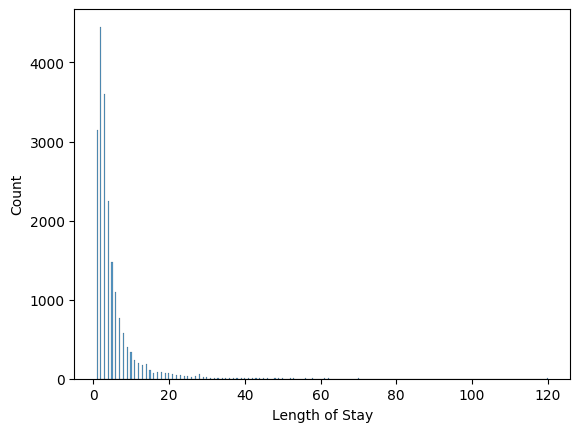

In [39]:
# Creating Bar chart as the Target variable is Continuous

sns.histplot(df['Length of Stay'][0:20000])
plt.show()

In [40]:
df['Length of Stay'].skew()

6.665090246012202

## Data distribution of the target variable is positivley skewed (i.e 6.67) and acceptable to proceed for further steps.

In [41]:
# Looking at the descriptive statistics of the numerical features
df.describe()

,Length of Stay,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges,Total Costs
count,167535.000000,167535.0,167535.000000,167535.000000,167535.000000,1.675350e+05,1.675350e+05
mean,5.140406,2018.0,408.696457,10.197481,2.138061,2.865706e+04,1.214615e+04
std,7.402765,0.0,240.324058,5.879210,0.912926,5.961058e+04,2.251408e+04
min,1.000000,2018.0,4.000000,1.000000,1.000000,3.073000e+01,5.960000e+00
25%,2.000000,2018.0,194.000000,5.000000,1.000000,8.248940e+03,3.815710e+03
50%,3.000000,2018.0,346.000000,8.000000,2.000000,1.516946e+04,6.837270e+03
75%,5.000000,2018.0,640.000000,15.000000,3.000000,3.003902e+04,1.332928e+04
max,120.000000,2018.0,952.000000,25.000000,4.000000,3.950530e+06,1.581903e+06


## In our dataset we have more number of object type variable which will be handled through encoding.

## Finding duplicated rows

In [42]:
df.duplicated().sum()

419

In [43]:
# Dropping duplicated records
health_data = df[~df.duplicated()]
health_data.shape

(167116, 30)

In [44]:
null_count = health_data.isnull().sum()
total_rows = len(health_data)
null_percentage = (null_count / total_rows) * 100
all_nulls = pd.DataFrame({'Null Count': null_count, 'Null Percentage': null_percentage})

all_nulls

,Null Count,Null Percentage
Hospital Service Area,0,0.000000
Hospital County,0,0.000000
Facility Name,0,0.000000
Age Group,0,0.000000
Short Zip Code,1411,0.844324
Gender,0,0.000000
Race,0,0.000000
Ethnicity,0,0.000000
Length of Stay,0,0.000000
Type of Admission,0,0.000000


## Imputing NaN values of CCSR Procedure code corresponding to the mode of its grouped by CCSR Diagnosis Code.

In [45]:
temp_table_procedure_code = health_data.groupby('CCSR Diagnosis Code')['CCSR Procedure Code'].value_counts().to_frame()
temp_table_procedure_code =temp_table_procedure_code.rename(columns={'CCSR Procedure Code':'count'}).reset_index()
procedure_code_dict = temp_table_procedure_code.sort_values('count').groupby('CCSR Diagnosis Code').last().to_dict()
procedure_code_dict = procedure_code_dict.get('CCSR Procedure Code')

In [46]:
health_data['CCSR Procedure Code'] = health_data['CCSR Procedure Code'].fillna(health_data['CCSR Diagnosis Code'].apply(lambda x: procedure_code_dict.get(x)))

## Imputing the value of CCSR Procedure Description corresponding to its CCSR Procedure Code.

In [47]:
temp_table_procedure_des = health_data.groupby('CCSR Procedure Code')['CCSR Procedure Description'].value_counts().to_frame()
temp_table_procedure_des =temp_table_procedure_des.rename(columns={'CCSR Procedure Description':'count'}).reset_index()
procedure_des_dict = temp_table_procedure_des.sort_values('count').groupby('CCSR Procedure Code').last().to_dict()
procedure_des_dict = procedure_des_dict.get('CCSR Procedure Description')

In [48]:
health_data['CCSR Procedure Description'] = health_data['CCSR Procedure Description'].fillna(health_data['CCSR Procedure Code'].map(procedure_des_dict))

In [49]:
health_data[['CCSR Procedure Code','CCSR Procedure Description']].isnull().sum()

CCSR Procedure Code           24
CCSR Procedure Description    24
dtype: int64

## We can drop remaining NaN values from CCSR Procedure Code and CCSR Procedure Description column.

In [50]:
health_data.dropna(axis=0,inplace=True)
health_data.isnull().sum()

Hospital Service Area                  0
Hospital County                        0
Facility Name                          0
Age Group                              0
Short Zip Code                         0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCSR Diagnosis Code                    0
CCSR Diagnosis Description             0
CCSR Procedure Code                    0
CCSR Procedure Description             0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surgical Description       0
Payment Typology

## Dropping Discharge Year Column as the dataset is for one year i.e., 2018

In [51]:
health_data.drop(['Discharge Year'], axis=1,inplace=True)

In [52]:
health_data.to_excel("health_data.xlsx", index=False)

In [53]:
health_data['Short Zip Code'] = health_data['Short Zip Code'].apply(lambda x: str(x).replace('OOS','999'))
health_data['Short Zip Code'] = health_data['Short Zip Code'].astype(np.number)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [54]:
health_data['Type of Admission'].value_counts()

Type of Admission
Emergency        98684
Elective         41399
Newborn          14089
Urgent           11424
Not Available       85
Name: count, dtype: int64

### Type of Admission of type 'Not Available' has 85 values i.e. 0.05%,imputing it with more repeated value of Type of Admission i.e., 'Emergency'.

In [55]:
health_data['Type of Admission'] = health_data['Type of Admission'].str.replace('Not Available','Emergency')

In [56]:
health_data['Ethnicity'].value_counts()

Ethnicity
Not Span/Hispanic    158258
Spanish/Hispanic       5727
Unknown                1696
Name: count, dtype: int64

In [57]:
round(health_data.Ethnicity.value_counts()/len(health_data)*100,2)

Ethnicity
Not Span/Hispanic    95.52
Spanish/Hispanic      3.46
Unknown               1.02
Name: count, dtype: float64

In [58]:
health_data[health_data.Ethnicity=='Unknown'].Race.value_counts()

Race
Other Race                1116
White                      484
Black/African American      96
Name: count, dtype: int64

### Converting 'Unknown' value of Ethincity (as it is 1.02% in the column) based on the Race feature as 'Other Race'.

In [59]:
health_data[health_data.Race=='Other Race'].Ethnicity.value_counts()

Ethnicity
Not Span/Hispanic    7052
Spanish/Hispanic     3389
Unknown              1116
Name: count, dtype: int64

In [60]:
health_data.Ethnicity=health_data.Ethnicity.replace('Unknown','Spanish/Hispanic')
health_data.Ethnicity.value_counts()

Ethnicity
Not Span/Hispanic    158258
Spanish/Hispanic       7423
Name: count, dtype: int64

## Type of Admissions column

In [61]:
health_data['Type of Admission'].value_counts()

Type of Admission
Emergency    98769
Elective     41399
Newborn      14089
Urgent       11424
Name: count, dtype: int64

In [62]:
health_data['Type of Admission'].isnull().sum()

0

## Patient Disposition column

In [63]:
health_data['Patient Disposition']

0         Inpatient Rehabilitation Facility
1              Home w/ Home Health Services
2                         Home or Self Care
3                         Home or Self Care
4                         Home or Self Care
                        ...                
167538                    Home or Self Care
167539                    Home or Self Care
167540                    Home or Self Care
167541                    Home or Self Care
167542                    Home or Self Care
Name: Patient Disposition, Length: 165681, dtype: object

In [64]:
health_data['Patient Disposition'].unique()

array(['Inpatient Rehabilitation Facility',
       'Home w/ Home Health Services', 'Home or Self Care', 'Expired',
       'Skilled Nursing Home', 'Short-term Hospital',
       'Left Against Medical Advice',
       "Cancer Center or Children's Hospital",
       'Psychiatric Hospital or Unit of Hosp', 'Court/Law Enforcement',
       'Another Type Not Listed', 'Hospice - Home',
       'Hospice - Medical Facility',
       'Facility w/ Custodial/Supportive Care',
       'Hosp Basd Medicare Approved Swing Bed',
       'Federal Health Care Facility',
       'Medicare Cert Long Term Care Hospital',
       'Critical Access Hospital'], dtype=object)

### Shortening the description, and mapping it to keywords

In [65]:
category_mapping = {
    'Inpatient Rehabilitation Facility': 'Specialized Hospitals',
    'Home w/ Home Health Services': 'Home Care',
    'Home or Self Care': 'Home Care',
    'Expired': 'Expired',
    'Skilled Nursing Home': 'Long-term Hospital Care',
    'Short-term Hospital': 'Short-term Hospital Care',
    'Left Against Medical Advice': 'Other',
    "Cancer Center or Children's Hospital": 'Specialized Hospitals',
    'Psychiatric Hospital or Unit of Hosp': 'Specialized Hospitals',
    'Court/Law Enforcement': 'Other',
    'Another Type Not Listed': 'Other',
    'Hospice - Home': 'Hospice Care',
    'Hospice - Medical Facility': 'Hospice Care',
    'Facility w/ Custodial/Supportive Care': 'Long-term Care Facilities',
    'Hosp Basd Medicare Approved Swing Bed': 'Long-term Hospital Care',
    'Federal Health Care Facility': 'Government Healthcare',
    'Medicare Cert Long Term Care Hospital': 'Long-term Hospital Care',
    'Critical Access Hospital': 'Specialized Hospitals'
}

In [66]:
health_data['Patient Disposition'] = health_data['Patient Disposition'].map(category_mapping)

In [67]:
health_data['Patient Disposition'].unique()

array(['Specialized Hospitals', 'Home Care', 'Expired',
       'Long-term Hospital Care', 'Short-term Hospital Care', 'Other',
       'Hospice Care', 'Long-term Care Facilities',
       'Government Healthcare'], dtype=object)

In [68]:
health_data['Patient Disposition'].value_counts()

Patient Disposition
Home Care                    127211
Long-term Hospital Care       21377
Other                          4635
Expired                        4440
Specialized Hospitals          3142
Short-term Hospital Care       3111
Hospice Care                   1115
Long-term Care Facilities       597
Government Healthcare            53
Name: count, dtype: int64

In [69]:
health_data['Patient Disposition'].isnull().sum()

0

## Discharge Year


### We Dropped it

## APR DRG Code

In [70]:
health_data['APR DRG Code'].value_counts()

APR DRG Code
640    11981
560     8983
720     8615
540     5135
194     5025
       ...  
613        4
841        3
843        3
692        2
583        1
Name: count, Length: 315, dtype: int64

In [71]:
health_data['APR DRG Code'].isnull().sum()

0

In [72]:
health_data['APR DRG Code'].unique()

array([721, 301,  24, 244, 254,  44, 171, 248, 141, 560, 138, 723, 133,
        22, 640, 222,  58, 469,  40, 190, 191, 304, 403, 200, 130, 199,
       720, 174,  52, 639,  20, 540,  47, 383, 443, 710, 519, 320, 513,
       542, 322, 230, 302, 282, 753, 139, 194, 755, 770, 773, 465, 279,
       775, 115, 313, 754,  42, 321, 284, 201, 140, 691, 425, 361, 347,
       231, 137, 247, 234,  53, 175, 380, 466, 134, 240, 344, 740, 463,
       663, 750,  43, 757, 305,  45, 182, 163, 482, 204, 793, 314, 420,
       192, 197, 198, 751, 346, 752, 181, 180, 245, 711, 227, 253, 441,
       251, 169, 249, 566, 950, 758, 263, 772, 426, 812, 241, 422, 817,
       315, 280, 167, 661, 662, 308, 364, 233, 243, 121, 381, 385, 760,
        50, 135, 756, 351, 952, 862, 113,  82,  54, 303,  21, 342, 563,
        55,  41, 340, 166,  98,  48, 930, 220, 660, 861, 165, 161, 143,
       281,  46, 951, 223, 131, 501,   5, 421, 317, 541, 424, 203, 252,
       193, 120, 142, 242, 696, 442, 384, 309, 500, 207, 446, 14

## APR DRG Description

In [73]:
health_data['APR DRG Description']

0         POST-OPERATIVE, POST-TRAUMATIC, OTHER DEVICE I...
1                                     HIP JOINT REPLACEMENT
2                          EXTRACRANIAL VASCULAR PROCEDURES
3                           DIVERTICULITIS & DIVERTICULOSIS
4                          OTHER DIGESTIVE SYSTEM DIAGNOSES
                                ...                        
167538    NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...
167539    NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...
167540    NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...
167541    NEONATE BWT 2000-2499G, NORMAL NEWBORN OR NEON...
167542    NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...
Name: APR DRG Description, Length: 165681, dtype: object

In [74]:
health_data['APR DRG Description'].isnull().sum()

0

In [75]:
health_data['APR DRG Description'].unique().tolist()

['POST-OPERATIVE, POST-TRAUMATIC, OTHER DEVICE INFECTIONS',
 'HIP JOINT REPLACEMENT',
 'EXTRACRANIAL VASCULAR PROCEDURES',
 'DIVERTICULITIS & DIVERTICULOSIS',
 'OTHER DIGESTIVE SYSTEM DIAGNOSES',
 'INTRACRANIAL HEMORRHAGE',
 'PERM CARDIAC PACEMAKER IMPLANT W/O AMI, HEART FAILURE OR SHOCK',
 'MAJOR GASTROINTESTINAL & PERITONEAL INFECTIONS',
 'ASTHMA',
 'VAGINAL DELIVERY',
 'BRONCHIOLITIS & RSV PNEUMONIA',
 'VIRAL ILLNESS',
 'RESPIRATORY FAILURE',
 'VENTRICULAR SHUNT PROCEDURES',
 'NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEONATE W OTHER PROBLEM',
 'OTHER STOMACH, ESOPHAGEAL & DUODENAL PROCEDURES',
 'OTHER DISORDERS OF NERVOUS SYSTEM',
 'ACUTE KIDNEY INJURY',
 'SPINAL DISORDERS & INJURIES',
 'ACUTE MYOCARDIAL INFARCTION',
 'CARDIAC CATHETERIZATION FOR CORONARY ARTERY DISEASE',
 'DORSAL & LUMBAR FUSION PROC EXCEPT FOR CURVATURE OF BACK',
 'PROCEDURES FOR OBESITY',
 'CARDIAC STRUCTURAL & VALVULAR DISORDERS',
 'RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS',
 'HYPERTENSION',


In [76]:
health_data['APR DRG Description'].value_counts()

APR DRG Description
NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEONATE W OTHER PROBLEM    11981
VAGINAL DELIVERY                                                      8983
SEPTICEMIA & DISSEMINATED INFECTIONS                                  8615
CESAREAN DELIVERY                                                     5135
HEART FAILURE                                                         5025
                                                                     ...  
NEONATE BIRTHWT 1500-1999G W CONGENITAL/PERINATAL INFECTION              4
EXTENSIVE 3RD DEGREE BURNS W SKIN GRAFT                                  3
EXTENSIVE 3RD DEGREE OR FULL THICKNESS BURNS W/O SKIN GRAFT              3
RADIOTHERAPY                                                             2
NEONATE W ECMO                                                           1
Name: count, Length: 315, dtype: int64

In [77]:
category1_mapping = {
   'POST-OPERATIVE, POST-TRAUMATIC, OTHER DEVICE INFECTIONS': 'Infections',
'HIP JOINT REPLACEMENT': 'Musculoskeletal Disorders',
'EXTRACRANIAL VASCULAR PROCEDURES': 'Other Diseases and Conditions',
'DIVERTICULITIS & DIVERTICULOSIS': 'Digestive System Disorders',
'OTHER DIGESTIVE SYSTEM DIAGNOSES': 'Digestive System Disorders',
'INTRACRANIAL HEMORRHAGE': 'Cardiovascular Diseases',
'PERM CARDIAC PACEMAKER IMPLANT W/O AMI, HEART FAIURE OR SHOCK':'Cardiovascular Diseases',
'MAJOR GASTROINTESTINAL & PERITONEAL INFECTIONS': 'Infections',
'ASTHMA': 'Respiratory Diseases',
'VAGINAL DELIVERY': 'Maternal and Obstetric Conditions',
'BRONCHIOLITIS & RSV PNEUMONIA': 'Respiratory Diseases',
'VIRAL ILLNESS': 'Infections',
'RESPIRATORY FAILURE': 'Respiratory Diseases',
'VENTRICULAR SHUNT PROCEDURES':'Other Diseases and Conditions' ,
'NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEONATE W OTHER PROBLEM':'Maternal and Obstetric Conditions',
'OTHER STOMACH, ESOPHAGEAL & DUODENAL PROCEDURES': 'Digestive System Disorders',
'OTHER DISORDERS OF NERVOUS SYSTEM': 'Nervous System Disorders',
'ACUTE KIDNEY INJURY': 'Endocrine Disorders',
'SPINAL DISORDERS & INJURIES' : 'Musculoskeletal Disorders',
'ACUTE MYOCARDIAL INFARCTION': 'Cardiovascular Diseases',
'CARDIAC CATHETERIZATION FOR CORONARY ARTERY DISEASE': 'Cardiovascular Diseases',
'DORSAL & LUMBAR FUSION PROC EXCEPT FOR CURVATURE OF BACK': 'Musculoskeletal Disorders',
'PROCEDURES FOR OBESITY': 'Other Diseases and Conditions',
'CARDIAC STRUCTURAL & VALVULAR DISORDERS': 'Cardiovascular Diseases',
'RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS': 'Respiratory Diseases',
'HYPERTENSION': 'Cardiovascular Diseases',
'SEPTICEMIA & DISSEMINATED INFECTIONS': 'Infections',
'PERCUTANEOUS CORONARY INTERVENTION W AMI': 'Cardiovascular Diseases',
'ALTERATION IN CONSCIOUSNESS': 'Other Diseases and Conditions',
'NEONATE BIRTHWT >2499G W OTHER SIGNIFICANT CONDITION': 'Maternal and Obstetric Conditions',
'CRANIOTOMY FOR TRAUMA':'Injury and Trauma',
'CESAREAN DELIVERY': 'Maternal and Obstetric Conditions',
'TRANSIENT ISCHEMIA': 'Cardiovascular Diseases',
'CELLULITIS & OTHER SKIN INFECTIONS':'Infections',
'KIDNEY & URINARY TRACT PROCEDURES FOR NONMALIGNANCY': 'Genitourinary Disorders',
'INFECTIOUS & PARASITIC DISEASES INCLUDING HIV W O.R. PROCEDURE': 'Infections',
'UTERINE & ADNEXA PROCEDURES FOR LEIOMYOMA': 'Genitourinary Disorders',
'OTHER MUSCULOSKELETAL SYSTEM & CONNECTIVE TISSUE PROCEDURES': 'Other Diseases and Conditions',
'UTERINE & ADNEXA PROCEDURES FOR NON-MALIGNANCY EXCEPT LEIOMYOMA': 'Cancer and Malignant Neoplasms',
'VAGINAL DELIVERY W COMPLICATING PROCEDURES EXC STERILIZATION &/OR D&C': 'Maternal and Obstetric Conditions',
'SHOULDER & ELBOW JOINT REPLACEMENT': 'Musculoskeletal Disorders',
'MAJOR SMALL BOWEL PROCEDURES': 'Digestive System Disorders',
'KNEE JOINT REPLACEMENT': 'Musculoskeletal Disorders',
'DISORDERS OF PANCREAS EXCEPT MALIGNANCY': 'Digestive System Disorders',
'BIPOLAR DISORDERS': 'Mental Health Disorders',
'OTHER PNEUMONIA': 'Respiratory Diseases',
'HEART FAILURE': 'Cardiovascular Diseases',
'ADJUSTMENT DISORDERS & NEUROSES EXCEPT DEPRESSIVE DIAGNOSES': 'Mental Health Disorders',
'DRUG & ALCOHOL ABUSE OR DEPENDENCE, LEFT AGAINST MEDICAL ADVICE': 'Other Diseases and Conditions',
'OPIOID ABUSE & DEPENDENCE': 'Mental Health Disorders',
'URINARY STONES & ACQUIRED UPPER URINARY TRACT OBSTRUCTION': 'Genitourinary Disorders',
'HEPATIC COMA & OTHER MAJOR ACUTE LIVER DISORDERS': 'Digestive System Disorders',
'ALCOHOL ABUSE & DEPENDENCE': 'Other Diseases and Conditions',
'OTHER EAR, NOSE, MOUTH,THROAT & CRANIAL/FACIAL DIAGNOSES': 'Other Diseases and Conditions',
'KNEE & LOWER LEG PROCEDURES EXCEPT FOOT': 'Musculoskeletal Disorders',
'DEPRESSION EXCEPT MAJOR DEPRESSIVE DISORDER': 'Mental Health Disorders',
'DEGENERATIVE NERVOUS SYSTEM DISORDERS EXC MULT SCLEROSIS': 'Nervous System Disorders',
'CERVICAL SPINAL FUSION & OTHER BACK/NECK PROC EXC DISC EXCIS/DECOMP': 'Musculoskeletal Disorders',
'DISORDERS OF GALLBLADDER & BILIARY TRACT': 'Digestive System Disorders',
'CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS' : 'Cardiovascular Diseases',
'CHRONIC OBSTRUCTIVE PULMONARY DISEASE': 'Respiratory Diseases',
'LYMPHOMA, MYELOMA & NON-ACUTE LEUKEMIA': 'Hematological Disorders',
'OTHER NON-HYPOVOLEMIC ELECTROLYTE DISORDERS': 'Hematological Disorders',
'SKIN GRAFT FOR SKIN & SUBCUTANEOUS TISSUE DIAGNOSES': 'Other Diseases and Conditions',
'OTHER BACK & NECK DISORDERS, FRACTURES & INJURIES': 'Musculoskeletal Disorders',
'MAJOR LARGE BOWEL PROCEDURES': 'Digestive System Disorders',
'MAJOR RESPIRATORY INFECTIONS & INFLAMMATIONS': 'Infections',
'INTESTINAL OBSTRUCTION': 'Digestive System Disorders',
'APPENDECTOMY WITHOUT COMPLEX PRINCIPAL DIAGNOSIS': 'Digestive System Disorders',
'SEIZURE': 'Nervous System Disorders',
'PERCUTANEOUS CORONARY INTERVENTION W/O AMI': 'Cardiovascular Diseases',
'SKIN ULCERS': 'Other Diseases and Conditions' ,
'MALFUNCTION, REACTION, COMPLIC OF GENITOURINARY DEVICE OR PROC': 'Genitourinary Disorders',
'PULMONARY EMBOLISM' : 'Cardiovascular Diseases',
'DIGESTIVE MALIGNANCY': 'Cancer and Malignant Neoplasms',
'OSTEOMYELITIS, SEPTIC ARTHRITIS & OTHER MUSCULOSKELETAL INFECTIONS': 'Infections',
'MENTAL ILLNESS DIAGNOSIS W O.R. PROCEDURE': 'Mental Health Disorders',
'KIDNEY & URINARY TRACT INFECTIONS' :'Infections',
'OTHER ANEMIA & DISORDERS OF BLOOD & BLOOD-FORMING ORGANS': 'Hematological Disorders',
'SCHIZOPHRENIA': 'Mental Health Disorders',
'MULTIPLE SCLEROSIS & OTHER DEMYELINATING DISEASES': 'Nervous System Disorders',
'ORGANIC MENTAL HEALTH DISTURBANCES': 'Mental Health Disorders',
'AMPUTATION OF LOWER LIMB EXCEPT TOES': 'Musculoskeletal Disorders',
'CVA & PRECEREBRAL OCCLUSION W INFARCT': 'Nervous System Disorders',
'OTHER PERIPHERAL VASCULAR PROCEDURES': 'Nervous System Disorders',
'CARDIAC VALVE PROCEDURES W/O AMI OR COMPLEX PDX': 'Cardiovascular Diseases',
'TRANSURETHRAL PROSTATECTOMY': 'Genitourinary Disorders',
'SYNCOPE & COLLAPSE': 'Nervous System Disorders',
'MODERATELY EXTENSIVE OR PROCEDURES FOR OTHER COMPLICATIONS OF TREATMENT': 'Injury and Trauma',
'FOOT & TOE PROCEDURES': 'Musculoskeletal Disorders',
'DIABETES': 'Endocrine Disorders',
'CARDIAC CATHETERIZATION FOR OTHER NON-CORONARY CONDITIONS': 'Cardiovascular Diseases',
'PERIPHERAL & OTHER VASCULAR DISORDERS': 'Cardiovascular Diseases',
'ANGINA PECTORIS & CORONARY ATHEROSCLEROSIS': 'Cardiovascular Diseases',
'MAJOR DEPRESSIVE DISORDERS & OTHER/UNSPECIFIED PSYCHOSES': 'Mental Health Disorders',
'CONNECTIVE TISSUE DISORDERS': 'Other Diseases and Conditions',
'DISORDERS OF PERSONALITY & IMPULSE CONTROL': 'Mental Health Disorders',
'LOWER EXTREMITY ARTERIAL PROCEDURES': 'Cardiovascular Diseases',
'OTHER CIRCULATORY SYSTEM PROCEDURES': 'Cardiovascular Diseases',
'INFLAMMATORY BOWEL DISEASE': 'Digestive System Disorders',
'POST-OP, POST-TRAUMA, OTHER DEVICE INFECTIONS W O.R. PROCEDURE': 'Infections',
'HERNIA PROCEDURES EXCEPT INGUINAL, FEMORAL & UMBILICAL': 'Digestive System Disorders',
'OTHER & UNSPECIFIED GASTROINTESTINAL HEMORRHAGE': 'Digestive System Disorders',
'MAJOR BLADDER PROCEDURES': 'Genitourinary Disorders',
'ABDOMINAL PAIN': 'Digestive System Disorders',
'MAJOR ABDOMINAL VASCULAR PROCEDURES': 'Other Diseases and Conditions',
'OTHER GASTROENTERITIS, NAUSEA & VOMITING': 'Digestive System Disorders',
'OTHER ANTEPARTUM DIAGNOSES': 'Maternal and Obstetric Conditions',
'EXTENSIVE PROCEDURE UNRELATED TO PRINCIPAL DIAGNOSIS': 'Other Diseases and Conditions',
'BEHAVIORAL DISORDERS': 'Mental Health Disorders',
'CHOLECYSTECTOMY': 'Other Diseases and Conditions',
'ALCOHOL & DRUG DEPENDENCE W REHAB OR REHAB/DETOX THERAPY': 'Mental health Disorders',
'NON-HYPOVOLEMIC SODIUM DISORDERS': 'Other Diseases and Conditions',
'POISONING OF MEDICINAL AGENTS': 'Other Diseases and Conditions',
'PEPTIC ULCER & GASTRITIS': 'Digestive System Disorders',
'HYPOVOLEMIA & RELATED ELECTROLYTE DISORDERS': 'Other Diseases and Conditions',
'OVERDOSE': 'Other Diseases and Conditions',
'SHOULDER, UPPER ARM & FOREARM PROCEDURES EXCEPT JOINT REPLACEMENT': 'Musculoskeletal Disorders',
'ALCOHOLIC LIVER DISEASE': 'Digestive System Disorders',
'OTHER CARDIOTHORACIC & THORACIC VASCULAR PROCEDURES': 'Cardiovascular Diseases',
'COAGULATION & PLATELET DISORDERS': 'Hematological Disorders',
'SICKLE CELL ANEMIA CRISIS': 'Hematological Disorders',
'HIP & FEMUR FRACTURE REPAIR': 'Injury and Trauma',
'OTHER SKIN, SUBCUTANEOUS TISSUE & RELATED PROCEDURES': 'Other Diseases and Conditions',
'APPENDECTOMY WITH COMPLEX PRINCIPAL DIAGNOSIS': 'Other Diseases and Conditions',
'OTHER ESOPHAGEAL DISORDERS': 'Digestive System Disorders',
'OTHER RESPIRATORY & CHEST PROCEDURES': 'Other Diseases and Conditions',
'MAJOR SKIN DISORDERS': 'Other Diseases and Conditions',
'OTHER SKIN, SUBCUTANEOUS TISSUE & BREAST DISORDERS': 'Other Diseases and Conditions',
'OTHER MENTAL HEALTH DISORDERS': 'Mental Health Disorders',
'NON-BACTERIAL INFECTIONS OF NERVOUS SYSTEM EXC VIRAL MENINGITIS': 'Infections',
'MAJOR CHEST & RESPIRATORY TRAUMA': 'Injury and Trauma',
'ACUTE ANXIETY & DELIRIUM STATES': 'Mental Health Disorders' ,
'OTHER MUSCULOSKELETAL SYSTEM & CONNECTIVE TISSUE DIAGNOSES': 'Musculoskeletal Disorders',
'NONEXTENSIVE PROCEDURE UNRELATED TO PRINCIPAL DIAGNOSIS': 'Other Diseases and Conditions',
'OTHER AFTERCARE & CONVALESCENCE': 'Other Diseases and Conditions',
'INFECTIONS OF UPPER RESPIRATORY TRACT': 'Infections',
'EYE INFECTIONS AND OTHER EYE DISORDERS': 'Infections',
'MIGRAINE & OTHER HEADACHES': 'Nervous System Disorders',
'DORSAL & LUMBAR FUSION PROC FOR CURVATURE OF BACK': 'Musculoskeletal Disorders',
'CRANIOTOMY EXCEPT FOR TRAUMA': 'Injury and Trauma',
'FRACTURES & DISLOCATIONS EXCEPT FEMUR, PELVIS & BACK': 'Injury and Trauma',
'PRETERM LABOR': 'Maternal and Obstetric Conditions',
'HEAD TRAUMA W COMA >1 HR OR HEMORRHAGE': 'Injury and Trauma',
'NERVOUS SYSTEM MALIGNANCY':'Cancer and Malignant Neoplasms',
'FRACTURE OF FEMUR': 'Injury and Trauma',
'CORONARY BYPASS W/O AMI OR COMPLEX PDX': 'Cardiovascular Diseases',
'OTHER EAR, NOSE, MOUTH & THROAT PROCEDURES': 'Other Diseases and Conditions',
'PERIPHERAL, CRANIAL & AUTONOMIC NERVE DISORDERS': 'Nervous System Disorders',
'MULTIPLE SIGNIFICANT TRAUMA W/O O.R. PROCEDURE': 'Injury and Trauma',
'MAJOR STOMACH, ESOPHAGEAL & DUODENAL PROCEDURES': 'Digestive System Disorders',
'MAJOR HEMATOLOGIC/IMMUNOLOGIC DIAG EXC SICKLE CELL CRISIS & COAGUL': 'Hematological Disorders',
'SIGNS, SYMPTOMS & OTHER FACTORS INFLUENCING HEALTH STATUS': 'Other Diseases and Conditions',
'CORONARY BYPASS W AMI OR COMPLEX PDX': 'Cardiovascular Diseases',
'CARDIAC DEFIBRILLATOR & HEART ASSIST IMPLANT': 'Cardiovascular Diseases',
'OTHER RESPIRATORY DIAGNOSES EXCEPT SIGNS, SYMPTOMS & MINOR DIAGNOSES': 'Respiratory Diseases',
'MALIGNANCY OF HEPATOBILIARY SYSTEM & PANCREAS': 'Cancer and Malignant Neoplasms',
'NONSPECIFIC CVA & PRECEREBRAL OCCLUSION W/O INFARCT': 'Cardiovascular Diseases',
'MODERATELY EXTENSIVE PROCEDURE UNRELATED TO PRINCIPAL DIAGNOSIS': 'Other Diseases and Conditions',
'OTHER SMALL & LARGE BOWEL PROCEDURES': 'Digestive System Disorders',
'CYSTIC FIBROSIS - PULMONARY DISEASE': 'Respiratory Diseases',
'MALE REPRODUCTIVE SYSTEM DIAGNOSES EXCEPT MALIGNANCY': 'Cancer and Malignant Neoplasms',
'TRACHEOSTOMY W MV 96+ HOURS W/O EXTENSIVE PROCEDURE': 'Respiratory Diseases',
'MALNUTRITION, FAILURE TO THRIVE & OTHER NUTRITIONAL DISORDERS': 'Other Diseases and Conditions',
'TENDON, MUSCLE & OTHER SOFT TISSUE PROCEDURES': 'Musculoskeletal Disorders',
'VAGINAL DELIVERY W STERILIZATION &/OR D&C': 'Maternal and Obstetric Conditions',
'OTHER ENDOCRINE DISORDERS': 'Endocrine Disorders',
'CHEST PAIN': 'Cardiovascular Diseases',
'MALFUNCTION, REACTION & COMPLICATION OF GI DEVICE OR PROCEDURE': 'Digestive System Disorders',
'ACUTE & SUBACUTE ENDOCARDITIS': 'Cardiovascular Diseases',
'MAJOR RESPIRATORY & CHEST PROCEDURES': 'Respiratory Diseases',
'INTERSTITIAL & ALVEOLAR LUNG DISEASES': 'Respiratory Diseases',
'MAJOR ESOPHAGEAL DISORDERS': 'Digestive System Disorders',
'OTHER CHEMOTHERAPY': 'Cancer and Malignant Neoplasms',
'KIDNEY & URINARY TRACT PROCEDURES FOR MALIGNANCY': 'Genitourinary Disorders',
'CONTUSION, OPEN WOUND & OTHER TRAUMA TO SKIN & SUBCUTANEOUS TISSUE': 'Injury and Trauma',
'OTHER SIGNIFICANT HIP & FEMUR SURGERY': 'Injury and Trauma',
'MALIGNANCY, MALE REPRODUCTIVE SYSTEM': 'Cancer and Malignant Neoplasms',
'OTHER CIRCULATORY SYSTEM DIAGNOSES': 'Other Diseases and Conditions',
'URETHRAL & TRANSURETHRAL PROCEDURES': 'Genitourinary Disorders',
'ACUTE BRONCHITIS AND RELATED SYMPTOMS': 'Respiratory Diseases',
'MAJOR CARDIOTHORACIC REPAIR OF HEART ANOMALY': 'Cardiovascular Diseases',
'FEMALE REPRODUCTIVE SYSTEM MALIGNANCY': 'Maternal and Obstetric Conditions',
'OTHER FEMALE REPRODUCTIVE SYSTEM & RELATED PROCEDURES': 'Maternal and Obstetric Conditions',
'OTHER DIGESTIVE SYSTEM & ABDOMINAL PROCEDURES': 'Digestive System Disorders',
'OTHER DISORDERS OF THE LIVER': 'Digestive System Disorders',
'MUSCULOSKELETAL & OTHER PROCEDURES FOR MULTIPLE SIGNIFICANT TRAUMA': 'Injury and Trauma',
'FEMALE REPRODUCTIVE SYSTEM INFECTIONS': 'Genitourinary Disorders',
'OTHER COMPLICATIONS OF TREATMENT': 'Other Diseases and Conditions',
'TOXIC EFFECTS OF NON-MEDICINAL SUBSTANCES': 'Other Diseases and Conditions',
'ALLERGIC REACTIONS': 'Infections',
'NON-EXTENSIVE OR PROCEDURES FOR OTHER COMPLICATIONS OF TREATMENT': 'Other Diseases and Conditions',
'MAJOR O.R. PROCEDURES FOR LYMPHATIC/HEMATOPOIETIC/OTHER NEOPLASMS': 'Cancer and Malignant Neoplasms',
'MALFUNCTION, REACTION, COMPLIC OF ORTHOPEDIC DEVICE OR PROCEDURE': 'Musculoskeletal disorders',
'MALFUNCTION,REACTION,COMPLICATION OF CARDIAC/VASC DEVICE OR PROCEDURE': 'Cardiovascular Diseases',
'CARDIAC PACEMAKER & DEFIBRILLATOR REVISION EXCEPT DEVICE REPLACEMENT': 'Cardiovascular Diseases',
'MASTECTOMY PROCEDURES': 'Cancer and Malignant Neoplasms',
'VERTIGO & OTHER LABYRINTH DISORDERS': 'Nervous System Disorders',
'NEONATE BIRTHWT >2499G W MAJOR ANOMALY': 'Maternal Obstetric Conditions',
'OTHER INJURY, POISONING & TOXIC EFFECT DIAGNOSES': 'Injury and Trauma',
'OTHER INFECTIOUS & PARASITIC DISEASES': 'Infections',
'NEONATE, BIRTHWT >2499G W RESP DIST SYND/OTH MAJ RESP COND': 'Respiratory Diseases' ,
'RESPIRATORY MALIGNANCY': 'Cancer and Malignant Neoplasms',
'OTHER NERVOUS SYSTEM & RELATED PROCEDURES': 'Nervous System Disorders',
'NEONATE BWT 2000-2499G W OTHER SIGNIFICANT CONDITION': 'Maternal and Obstetric Conditions',
'OTHER KIDNEY & URINARY TRACT DIAGNOSES, SIGNS & SYMPTOMS': 'Genitourinary Disorders',
'THYROID, PARATHYROID & THYROGLOSSAL PROCEDURES': 'Endocrine Disorders',
'REHABILITATION': 'Mental Health Disorders',
'INTERVERTEBRAL DISC EXCISION & DECOMPRESSION': 'Musculoskeletal Disorders',
'FEVER': 'Infections',
'NEONATE BWT 2000-2499G, NORMAL NEWBORN OR NEONATE W OTHER PROBLEM': 'Other Diseases and Conditions',
'TRACHEOSTOMY W MV 96+ HOURS W EXTENSIVE PROCEDURE':'Respiratory Diseases',
'KIDNEY TRANSPLANT': 'Genitourinary Disorders',
'COCAINE ABUSE & DEPENDENCE': 'Mental Health Disorders',
'PROCEDURE W DIAG OF REHAB, AFTERCARE OR OTH CONTACT W HEALTH SERVICE': 'Other Diseases and conditions',
'HEMORRHAGE OR HEMATOMA DUE TO COMPLICATION': 'Injury and Trauma',
'CHRONIC KIDNEY DISEASE': 'Endocrine Disorders',
'SPINAL PROCEDURES': 'Musculoskeletal Disorders',
'LYMPHATIC & OTHER MALIGNANCIES & NEOPLASMS OF UNCERTAIN BEHAVIOR': 'Other',
'HAND & WRIST PROCEDURES': 'Musculoskeletal Disorders',
'NEONATE, TRANSFERRED < 5 DAYS OLD, BORN HERE': 'Maternal and Obstetric Conditions',
'KIDNEY & URINARY TRACT MALIGNANCY': 'Cancer and Malignant Neoplasms',
'FRACTURE OF PELVIS OR DISLOCATION OF HIP': 'Injury and Trauma',
'OTHER DRUG ABUSE & DEPENDENCE': 'Other Diseases and Conditions',
'CHEMOTHERAPY FOR ACUTE LEUKEMIA': 'Cancer and Malignant Neoplasms',
'RENAL DIALYSIS ACCESS DEVICE AND VESSEL REPAIR': 'Genitourinary Disorders',
'SKIN GRAFT, EXCEPT HAND, FOR MUSCULOSKELETAL & CONNECTIVE TISSUE DIAGNOSES': 'Musculoskeletal Disorders',
'BACTERIAL & TUBERCULOUS INFECTIONS OF NERVOUS SYSTEM': 'Infections',
'MAJOR PANCREAS, LIVER & SHUNT PROCEDURES': 'Digestive System Disorders',
'UTERINE & ADNEXA PROCEDURES FOR OVARIAN & ADNEXAL MALIGNANCY': 'Cancer and Malignant Neoplasms',
'DILATION & CURETTAGE FOR NON-OBSTETRIC DIAGNOSES': 'Other Diseases and Conditions',
'OTHER MALE REPRODUCTIVE SYSTEM & RELATED PROCEDURES': 'Genitourinary Disorders',
'PARTIAL THICKNESS BURNS W/O SKIN GRAFT': 'injury and Trauma',
'EAR, NOSE, MOUTH, THROAT, CRANIAL/FACIAL MALIGNANCIES': 'Cancer and Malignant Neoplasms' ,
'TONSIL & ADENOID PROCEDURES': 'Other Diseases and Conditions',
'NEONATE BIRTHWT 1500-1999G W MAJOR ANOMALY': 'Maternal and Obstetric Conditions',
'CONCUSSION, CLOSED SKULL FX NOS,UNCOMPLICATED INTRACRANIAL INJURY, COMA < 1 HR OR NO COMA': 'Injury and Trauma',
'NEONATE BIRTHWT >2499G W CONGENITAL/PERINATAL INFECTION': 'Infection',
'GASTROINTESTINAL VASCULAR INSUFFICIENCY': 'Digestive System Disorders',
'NEONATE BWT 1500-2499G W MAJOR PROCEDURE': 'Maternal and Obstetric Conditions',
'PERITONEAL ADHESIOLYSIS': 'Digestive System Disorders',
'OTHER HEPATOBILIARY, PANCREAS & ABDOMINAL PROCEDURES': 'Digestive System Disorders',
'NEONATE BIRTHWT 750-999G W/O MAJOR PROCEDURE': 'Maternal and Obstetric Conditions',
'INGUINAL, FEMORAL & UMBILICAL HERNIA PROCEDURES': 'Digestive System Disorders',
'BREAST PROCEDURES EXCEPT MASTECTOMY': 'Cancer and Malignant Neoplasms' ,
'ACUTE LEUKEMIA': 'Cancer and Malignant Neoplasms',
'FALSE LABOR': 'Maternal and Obstetric Conditions',
'EATING DISORDERS': 'Mental Health Disorders',
'OTHER MAJOR HEAD & NECK PROCEDURES': 'Musculoskeletal Disorders',
'OTHER O.R. PROC FOR OBSTETRIC DIAGNOSES EXCEPT DELIVERY DIAGNOSES': 'Maternal and Obstetric Conditions',
'OTHER O.R. PROCEDURES FOR LYMPHATIC/HEMATOPOIETIC/OTHER NEOPLASMS': 'Cancer and Malignant Neoplasms',
'MALIGNANT BREAST DISORDERS': 'Cancer and Malignant Neoplasms',
'D&C, ASPIRATION CURETTAGE OR HYSTEROTOMY FOR OBSTETRIC DIAGNOSES': 'Maternal and Obstetric Conditions',
'NEONATE BWT 2000-2499G W MAJOR ANOMALY': 'Maternal and Obstetric Conditions' ,
'NEONATE BWT <500G OR GA <24 WEEKS': 'Maternal and Obstetric Conditions',
'NEONATE BWT 1000-1249G W RESP DIST SYND/OTH MAJ RESP OR MAJ ANOM': 'Maternal and Obstetric Conditions',
'PENIS, TESTES & SCROTAL PROCEDURES': 'Genitourinary Disorders',
'NEONATE BIRTHWT >2499G W OTHER MAJOR PROCEDURE': 'Maternal and Obstetric Conditions',
'NEONATE BWT 1500-1999G W RESP DIST SYND/OTH MAJ RESP COND': 'Maternal and Obstetric Conditions',
'NEONATE BWT 1250-1499G W RESP DIST SYND/OTH MAJ RESP OR MAJ ANOM': 'Maternal and Obstetric Conditions',
'MAJOR BILIARY TRACT PROCEDURES': 'Digestive System Disorders',
'NEONATE BWT 1500-1999G W OR W/O OTHER SIGNIFICANT CONDITION': 'Maternal and Obstetric Conditions',
'DENTAL DISEASES AND DISORDERS': 'Other Diseases and Conditions',
'NEONATE BIRTHWT 1500-1999G W CONGENITAL/PERINATAL INFECTION': 'Maternal and Obstetric Conditions',
'NEONATE BWT 2000-2499G W RESP DIST SYND/OTH MAJ RESP COND': 'Maternal and Obstetric Conditions',
'ANOXIC & OTHER SEVERE BRAIN DAMAGE': 'Nervous System Disorders',
'ANAL PROCEDURES': 'Digestive System Disorders',
'NEPHRITIS & NEPHROSIS': 'Genitourinary Disorders',
'MAJOR MALE PELVIC PROCEDURES': 'Genitourinary Disorders',
'SPLENECTOMY': 'Other Diseases and Conditions',
'MENSTRUAL & OTHER FEMALE REPRODUCTIVE SYSTEM DISORDERS': 'Maternal and Obstetric Conditions',
'THYROID DISORDERS': 'Endocrine Disorders',
'RESPIRATORY SIGNS, SYMPTOMS & MINOR DIAGNOSES': 'Respiratory Diseases',
'EXTENSIVE OR PROCEDURES FOR OTHER COMPLICATIONS OF TREATMENT': 'Other Diseases and Conditions',
'AUTOLOGOUS BONE MARROW TRANSPLANT': 'Hematological Disorders',
'OTHER PROCEDURES FOR ENDOCRINE, NUTRITIONAL & METABOLIC DISORDERS': 'Other Diseases and Conditions',
'CARDIAC ARREST & SHOCK': 'Cardiovascular Diseases',
'OTHER KIDNEY, URINARY TRACT & RELATED PROCEDURES': 'Genitourinary Disorders',
'EXTENSIVE ABDOMINAL/THORACIC PROCEDURES FOR MULT SIGNIFICANT TRAUMA': 'Injury and Trauma',
'BURNS WITH SKIN GRAFT EXCEPT EXTENSIVE 3RD DEGREE BURNS': 'Injury and Trauma',
'MUSCULOSKELETAL MALIGNANCY & PATHOL FRACTURE D/T MUSCSKEL MALIG': 'Cancer and Malignant Neoplasms',
'VIRAL MENINGITIS': 'Infections',
'MAJOR CRANIAL/FACIAL BONE PROCEDURES': 'Musculoskeletal Disorders',
'BRAIN CONTUSION/LACERATION & COMPLICATED SKULL FX, COMA < 1 HR OR NO COMA': 'Nervous System Disorders',
'BPD & OTH CHRONIC RESPIRATORY DISEASES ARISING IN PERINATAL PERIOD': 'Respiratory Diseases',
'CRANIOTOMY FOR MULTIPLE SIGNIFICANT TRAUMA': 'Injury and Trauma',
'CLEFT LIP & PALATE REPAIR': 'Other Diseases and Conditions',
'CARDIOMYOPATHY': 'Cardiovascular Diseases',
'INBORN ERRORS OF METABOLISM': 'Other Diseases and Conditions',
'CARDIAC PACEMAKER & DEFIBRILLATOR DEVICE REPLACEMENT': 'Cardiovascular Diseases',
'ALLOGENEIC BONE MARROW TRANSPLANT': 'Hematological Disorders',
'GASTRIC FUNDOPLICATION': 'Digestive System Disorders',
'EXTRACORPOREAL MEMBRANE OXYGENATION (ECMO)': 'Respiratory Diseases',
'FACIAL BONE PROCEDURES EXCEPT MAJOR CRANIAL/FACIAL BONE PROCEDURES': 'Musculoskeletal Disorders',
'NEONATE BIRTHWT 500-749G W/O MAJOR PROCEDURE': 'Maternal and Obstetric Conditions',
'NEONATE BWT 1250-1499G W OR W/O OTHER SIGNIFICANT CONDITION': 'Maternal and Obstetric Conditions',
'EXTENSIVE 3RD DEGREE BURNS W SKIN GRAFT': 'Injury and Trauma',
'UTERINE & ADNEXA PROCEDURES FOR NON-OVARIAN & NON-ADNEXAL MALIG': 'Cancer and Malignant Neoplasms',
'PELVIC EVISCERATION, RADICAL HYSTERECTOMY & OTHER RADICAL GYN PROCS': 'Maternal and Obstetric Conditions',
'NEONATE BWT 2000-2499G W CONGENITAL/PERINATAL INFECTION': 'Infections',
'OTHER BLADDER PROCEDURES': 'Digestive System Disorders',
'FEMALE REPRODUCTIVE SYSTEM RECONSTRUCTIVE PROCEDURES': 'Maternal and Obstetric Conditions',
'PANCREAS TRANSPLANT': 'Other Diseases and Conditions',
'CARDIAC VALVE PROCEDURES W AMI OR COMPLEX PDX': 'Cardiovascular Diseases',
'ADRENAL PROCEDURES': 'Other Diseases and conditions',
'EXTENSIVE 3RD DEGREE OR FULL THICKNESS BURNS W/O SKIN GRAFT': 'Injury and Trauma',
'NEONATE, TRANSFERRED <5 DAYS OLD, NOT BORN HERE': 'Maternal and Obstetric Conditions',
'ORBIT AND EYE PROCEDURES': 'Other Diseases and Conditions',
'OTHER PROCEDURES OF BLOOD & BLOOD-FORMING ORGANS': 'Hematological Disorders',
'NEONATE W ECMO': 'Respiratory Diseases',
'NEONATE BWT <1500G W MAJOR PROCEDURE': 'Maternal and Obstetric Conditions',
'NEONATE BIRTHWT 1000-1249G W OR W/O OTHER SIGNIFICANT CONDITION': 'Maternal and Obstetric Conditions',
'HEAD TRAUMA WITH DEEP COMA': 'Injury and Trauma',
'RADIOTHERAPY': 'Cancer and Malignant Neoplasms',
'PERMANENT CARDIAC PACEMAKER IMPLANT W AMI, HEART FAILURE OR SHOCK': 'Cardiovascular Diseases'





}

In [78]:
health_data['APR DRG Description'] = health_data['APR DRG Description'].map(category1_mapping)

In [79]:
health_data['APR DRG Description'].value_counts()

APR DRG Description
Maternal and Obstetric Conditions    29548
Cardiovascular Diseases              19832
Infections                           17879
Musculoskeletal Disorders            16603
Other Diseases and Conditions        16006
Digestive System Disorders           15279
Respiratory Diseases                 12417
Mental Health Disorders               9201
Nervous System Disorders              7233
Endocrine Disorders                   4916
Injury and Trauma                     4749
Cancer and Malignant Neoplasms        3279
Hematological Disorders               3048
Genitourinary Disorders               2589
Mental health Disorders               1523
Other Diseases and conditions          332
Musculoskeletal disorders              208
Maternal Obstetric Conditions          192
Other                                  138
injury and Trauma                      109
Infection                               63
Name: count, dtype: int64

In [80]:
health_data['APR DRG Description'] = health_data['APR DRG Description'].str.replace('Mental health Disaeses', 'Mental Health Diseases')
health_data['APR DRG Description'] = health_data['APR DRG Description'].str.replace('Other Diseases and conditions', 'Other Diseases and Conditions')
health_data['APR DRG Description'] = health_data['APR DRG Description'].str.replace('Musculoskeletal disorders', 'Musculoskeletal Disorders')
health_data['APR DRG Description'] = health_data['APR DRG Description'].str.replace('Maternal Obstetric Conditions', 'Maternal and Obstetric Conditions')
health_data['APR DRG Description'] = health_data['APR DRG Description'].str.replace('Other', 'Other Diseases and Conditions')
health_data['APR DRG Description'] = health_data['APR DRG Description'].str.replace('injury and Trauma', 'Injury and Trauma')
health_data['APR DRG Description'] = health_data['APR DRG Description'].str.replace('Infection', 'Infections')
health_data['APR DRG Description'] = health_data['APR DRG Description'].str.replace('Infectionss', 'Infections')

In [81]:
health_data['APR DRG Description'].value_counts()

APR DRG Description
Maternal and Obstetric Conditions                        29740
Cardiovascular Diseases                                  19832
Infections                                               17942
Musculoskeletal Disorders                                16811
Other Diseases and Conditions Diseases and Conditions    16338
Digestive System Disorders                               15279
Respiratory Diseases                                     12417
Mental Health Disorders                                   9201
Nervous System Disorders                                  7233
Endocrine Disorders                                       4916
Injury and Trauma                                         4858
Cancer and Malignant Neoplasms                            3279
Hematological Disorders                                   3048
Genitourinary Disorders                                   2589
Mental health Disorders                                   1523
Other Diseases and Conditions      

# Outliers:-

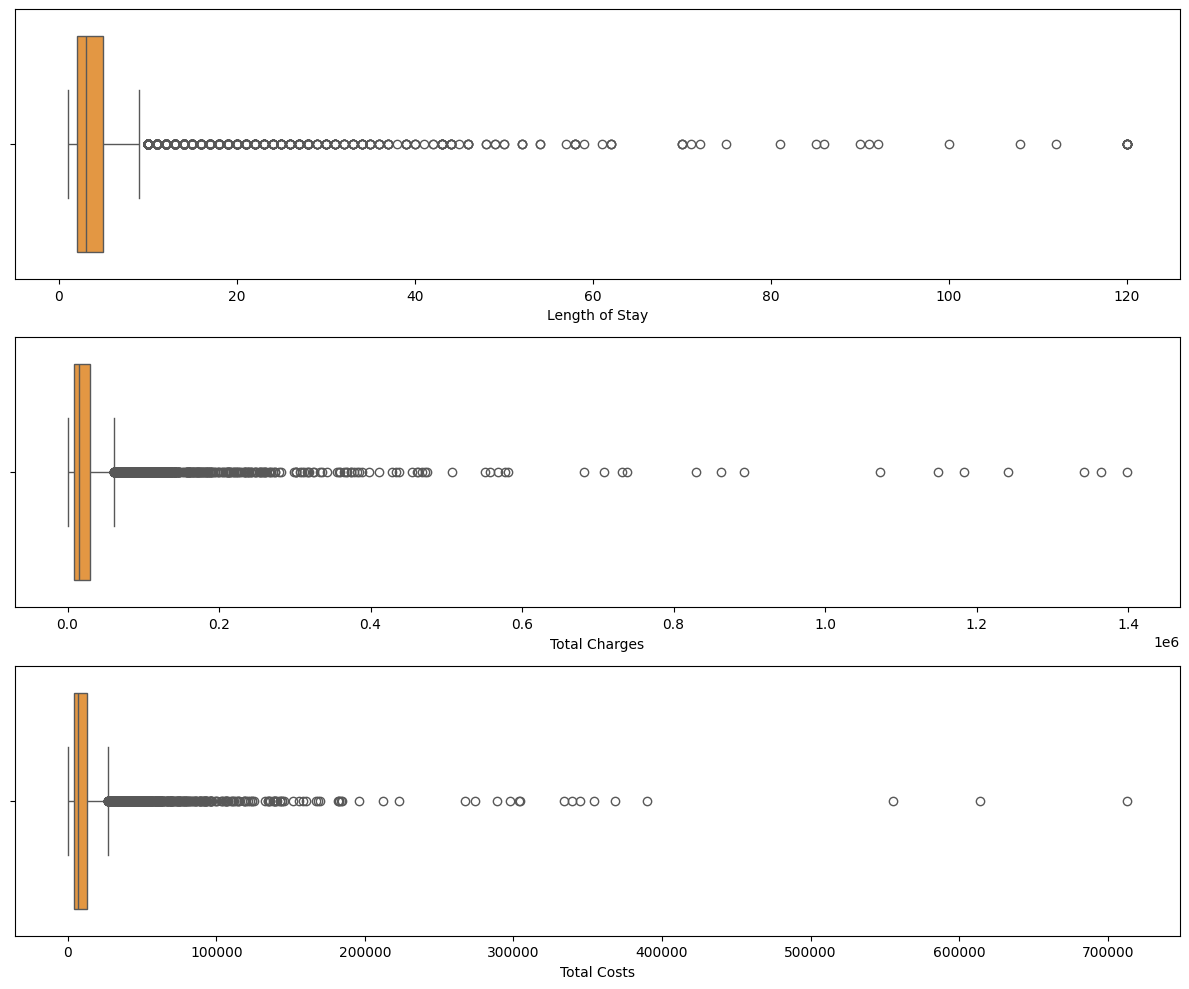

In [82]:
rows = 3
columns = 1
index=1
plt.figure(figsize=(12,10))
for i in ['Length of Stay','Total Charges','Total Costs']:
    plt.subplot(rows,columns,index)
    sns.boxplot(x= health_data[i][0:10000],palette="YlOrBr")
    index+=1
plt.tight_layout()
plt.show()

# From above graphs we can see that outliers in the Total Charges and Total Costs, will handle it in later steps

In [85]:
unique_f = health_data['Facility Name'].unique().tolist()
unique_f

['Buffalo General Medical Center',
 "John R. Oishei Children's Hospital",
 'Millard Fillmore Suburban Hospital',
 'UPMC Chautauqua at WCA',
 'Sisters of Charity Hospital',
 'Wyoming County Community Hospital',
 'Erie County Medical Center',
 'Mercy Hospital of Buffalo',
 'Olean General Hospital',
 'Kenmore Mercy Hospital',
 'Brooks-TLC Hospital System, Inc.',
 "Mount St. Mary's Hospital and Health Center",
 'Memorial Hosp of Wm F & Gertrude F Jones A/K/A Jones Memorial Hosp',
 'Eastern Niagara Hospital - Lockport Division',
 'Roswell Park Cancer Institute',
 'United Memorial Medical Center North Street Campus',
 'Niagara Falls Memorial Medical Center',
 'Sisters of Charity Hospital - St. Joseph Campus',
 'Bertrand Chaffee Hospital',
 'Cuba Memorial Hospital Inc',
 'Degraff Memorial Hospital',
 'United Memorial Medical Center Bank Street Campus',
 'Medina Memorial Hospital',
 'Westfield Memorial Hospital Inc']

<font color="lightblue"> I wanted to shorten the names for our analysis, but once we present we will use the full names for the hositals rather than the shortened names.

In [86]:
hospitals = {
    'Facility Name':[
        'Buffalo General Medical Center',
        "John R. Oishei Children's Hospital",
        'Millard Fillmore Suburban Hospital',
        'UPMC Chautauqua at WCA',
        'Sisters of Charity Hospital',
        'Wyoming County Community Hospital',
        'Erie County Medical Center',
        'Mercy Hospital of Buffalo',
        'Olean General Hospital',
        'Kenmore Mercy Hospital',
        'Brooks-TLC Hospital System, Inc.',
        "Mount St. Mary's Hospital and Health Center",
        'Memorial Hosp of Wm F & Gertrude F Jones A/K/A Jones Memorial Hosp',
        'Eastern Niagara Hospital - Lockport Division',
        'Roswell Park Cancer Institute',
        'United Memorial Medical Center North Street Campus',
        'Niagara Falls Memorial Medical Center',
        'Sisters of Charity Hospital - St. Joseph Campus',
        'Bertrand Chaffee Hospital',
        'Cuba Memorial Hospital Inc',
        'Degraff Memorial Hospital',
        'United Memorial Medical Center Bank Street Campus',
        'Medina Memorial Hospital',
        'Westfield Memorial Hospital Inc']
}

In [87]:
hospitals_mapping = {
        'Buffalo General Medical Center': 'Buffalo General',
        "John R. Oishei Children's Hospital": "Oishei Children's",
        'Millard Fillmore Suburban Hospital': 'Suburban',
        'UPMC Chautauqua at WCA': 'UPMC',
        'Sisters of Charity Hospital': 'Sisters',
        'Wyoming County Community Hospital': 'WCCHS',
        'Erie County Medical Center': 'ECMC',
        'Mercy Hospital of Buffalo': 'Mercy',
        'Olean General Hospital': 'Olean General',
        'Kenmore Mercy Hospital': 'Kenmore Mercy',
        'Brooks-TLC Hospital System, Inc.': 'Brooks',
        "Mount St. Mary's Hospital and Health Center": "Mount St. Mary's",
        'Memorial Hosp of Wm F & Gertrude F Jones A/K/A Jones Memorial Hosp': 'Jones Memorial',
        'Eastern Niagara Hospital - Lockport Division': 'Eastern Niagara',
        'Roswell Park Cancer Institute': 'Roswell Park',
        'United Memorial Medical Center North Street Campus': 'United Memorial - North',
        'Niagara Falls Memorial Medical Center': 'Niagara Falls Memorial',
        'Sisters of Charity Hospital - St. Joseph Campus': 'Sisters - St.Joseph',
        'Bertrand Chaffee Hospital': 'Bertrand Chaffee',
        'Cuba Memorial Hospital Inc': 'Cuba Memorial',
        'Degraff Memorial Hospital': 'Degraff',
        'United Memorial Medical Center Bank Street Campus': 'United Memorial - Bank',
        'Medina Memorial Hospital': 'Medina Memorial',
        'Westfield Memorial Hospital Inc': 'Westfield Memorial'
}

In [88]:
health_data.replace({'Facility Name': hospitals_mapping}, inplace=True)

In [89]:
health_data

,Hospital Service Area,Hospital County,Facility Name,Age Group,Short Zip Code,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Emergency Department Indicator,Total Charges,Total Costs,General_MDC
0,Western NY,Erie,Buffalo General,70 or Older,142.0,F,White,Not Span/Hispanic,8,Emergency,Specialized Hospitals,INJ037,COMPLICATION OF OTHER SURGICAL OR MEDICAL CARE...,MST020,SUBCUTANEOUS TISSUE AND FASCIA EXCISION,721,Infections,18,INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR...,4,Extreme,Extreme,Medical,Medicare,Blue Cross/Blue Shield,True,55367.55,20121.21,Infectious Diseases
1,Western NY,Erie,Buffalo General,50 to 69,141.0,M,Other Race,Spanish/Hispanic,2,Urgent,Home Care,INJ006,"FRACTURE OF THE NECK OF THE FEMUR (HIP), INITI...",MST007,HIP ARTHROPLASTY,301,Musculoskeletal Disorders,8,DISEASES AND DISORDERS OF THE MUSCULOSKELETAL ...,2,Moderate,Minor,Surgical,Miscellaneous/Other,Private Health Insurance,False,48328.30,16943.32,Musculoskeletal System
2,Western NY,Erie,Buffalo General,70 or Older,147.0,M,White,Not Span/Hispanic,1,Elective,Home Care,CIR023,OCCLUSION OR STENOSIS OF PRECEREBRAL OR CEREBR...,CAR006,CAROTID ENDARTERECTOMY AND STENTING,24,Other Diseases and Conditions Diseases and Con...,1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,1,Minor,Minor,Surgical,Medicare,Self-Pay,False,17052.12,7673.72,Nervous System
3,Western NY,Erie,Buffalo General,50 to 69,142.0,F,Black/African American,Not Span/Hispanic,6,Emergency,Home Care,DIG013,DIVERTICULOSIS AND DIVERTICULITIS,GIS002,COLONOSCOPY AND PROCTOSCOPY WITH BIOPSY,244,Digestive System Disorders,6,DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM,3,Major,Moderate,Medical,Medicare,Self-Pay,True,17287.12,9058.50,Digestive System
4,Western NY,Erie,Buffalo General,30 to 49,147.0,M,White,Not Span/Hispanic,1,Emergency,Home Care,END012,CYSTIC FIBROSIS,CAR024,VENOUS AND ARTERIAL CATHETER PLACEMENT,254,Digestive System Disorders,6,DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM,2,Moderate,Minor,Medical,Private Health Insurance,Self-Pay,True,6821.06,1987.18,Digestive System
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167538,Western NY,Niagara,Mount St. Mary's,0 to 17,141.0,F,White,Not Span/Hispanic,2,Newborn,Home Care,PNL001,LIVEBORN,MRS001,CIRCUMCISION,640,Maternal and Obstetric Conditions,15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Blue Cross/Blue Shield,Blue Cross/Blue Shield,False,2452.56,3887.06,Neonatal Disorders
167539,Western NY,Niagara,Mount St. Mary's,0 to 17,143.0,M,White,Not Span/Hispanic,2,Newborn,Home Care,PNL001,LIVEBORN,CAR024,VENOUS AND ARTERIAL CATHETER PLACEMENT,640,Maternal and Obstetric Conditions,15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,"Managed Care, Unspecified","Managed Care, Unspecified",False,2621.43,3992.01,Neonatal Disorders
167540,Western NY,Niagara,Mount St. Mary's,0 to 17,143.0,M,Black/African American,Not Span/Hispanic,2,Newborn,Home Care,PNL001,LIVEBORN,MRS001,CIRCUMCISION,640,Maternal and Obstetric Conditions,15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Private Health Insurance,Private Health Insurance,False,2390.95,3860.08,Neonatal Disorders
167541,Western NY,Niagara,Mount St. Mary's,0 to 17,141.0,M,White,Not Span/Hispanic,1,Newborn,Home Care,PNL001,LIVEBORN,MRS001,CIRCUMCISION,626,Other Diseases and Conditions Diseases and Con...,15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Blue Cross/Blue Shield,Blue Cross/Blue Shield,False,1338.51,2044.00,Neonatal Disorders


In [90]:
health_data.to_excel("health_data_clean.xlsx", index=False)

In [91]:
health_data

,Hospital Service Area,Hospital County,Facility Name,Age Group,Short Zip Code,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Emergency Department Indicator,Total Charges,Total Costs,General_MDC
0,Western NY,Erie,Buffalo General,70 or Older,142.0,F,White,Not Span/Hispanic,8,Emergency,Specialized Hospitals,INJ037,COMPLICATION OF OTHER SURGICAL OR MEDICAL CARE...,MST020,SUBCUTANEOUS TISSUE AND FASCIA EXCISION,721,Infections,18,INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR...,4,Extreme,Extreme,Medical,Medicare,Blue Cross/Blue Shield,True,55367.55,20121.21,Infectious Diseases
1,Western NY,Erie,Buffalo General,50 to 69,141.0,M,Other Race,Spanish/Hispanic,2,Urgent,Home Care,INJ006,"FRACTURE OF THE NECK OF THE FEMUR (HIP), INITI...",MST007,HIP ARTHROPLASTY,301,Musculoskeletal Disorders,8,DISEASES AND DISORDERS OF THE MUSCULOSKELETAL ...,2,Moderate,Minor,Surgical,Miscellaneous/Other,Private Health Insurance,False,48328.30,16943.32,Musculoskeletal System
2,Western NY,Erie,Buffalo General,70 or Older,147.0,M,White,Not Span/Hispanic,1,Elective,Home Care,CIR023,OCCLUSION OR STENOSIS OF PRECEREBRAL OR CEREBR...,CAR006,CAROTID ENDARTERECTOMY AND STENTING,24,Other Diseases and Conditions Diseases and Con...,1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,1,Minor,Minor,Surgical,Medicare,Self-Pay,False,17052.12,7673.72,Nervous System
3,Western NY,Erie,Buffalo General,50 to 69,142.0,F,Black/African American,Not Span/Hispanic,6,Emergency,Home Care,DIG013,DIVERTICULOSIS AND DIVERTICULITIS,GIS002,COLONOSCOPY AND PROCTOSCOPY WITH BIOPSY,244,Digestive System Disorders,6,DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM,3,Major,Moderate,Medical,Medicare,Self-Pay,True,17287.12,9058.50,Digestive System
4,Western NY,Erie,Buffalo General,30 to 49,147.0,M,White,Not Span/Hispanic,1,Emergency,Home Care,END012,CYSTIC FIBROSIS,CAR024,VENOUS AND ARTERIAL CATHETER PLACEMENT,254,Digestive System Disorders,6,DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM,2,Moderate,Minor,Medical,Private Health Insurance,Self-Pay,True,6821.06,1987.18,Digestive System
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167538,Western NY,Niagara,Mount St. Mary's,0 to 17,141.0,F,White,Not Span/Hispanic,2,Newborn,Home Care,PNL001,LIVEBORN,MRS001,CIRCUMCISION,640,Maternal and Obstetric Conditions,15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Blue Cross/Blue Shield,Blue Cross/Blue Shield,False,2452.56,3887.06,Neonatal Disorders
167539,Western NY,Niagara,Mount St. Mary's,0 to 17,143.0,M,White,Not Span/Hispanic,2,Newborn,Home Care,PNL001,LIVEBORN,CAR024,VENOUS AND ARTERIAL CATHETER PLACEMENT,640,Maternal and Obstetric Conditions,15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,"Managed Care, Unspecified","Managed Care, Unspecified",False,2621.43,3992.01,Neonatal Disorders
167540,Western NY,Niagara,Mount St. Mary's,0 to 17,143.0,M,Black/African American,Not Span/Hispanic,2,Newborn,Home Care,PNL001,LIVEBORN,MRS001,CIRCUMCISION,640,Maternal and Obstetric Conditions,15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Private Health Insurance,Private Health Insurance,False,2390.95,3860.08,Neonatal Disorders
167541,Western NY,Niagara,Mount St. Mary's,0 to 17,141.0,M,White,Not Span/Hispanic,1,Newborn,Home Care,PNL001,LIVEBORN,MRS001,CIRCUMCISION,626,Other Diseases and Conditions Diseases and Con...,15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Blue Cross/Blue Shield,Blue Cross/Blue Shield,False,1338.51,2044.00,Neonatal Disorders
